In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to Machine Learning

This chapter introduces some common concepts about learning (such as supervised and unsupervised learning) and some simples applications.

### Supervised Learning

* Classification (labels)
* Regression (real)

Learn when we have a dataset with points and true responses variables. If we use a probabilistic approach to this kind of inference, we want to find the probability distribution of the response $y$ given the training dataset $\mathcal{D}$  and a new point $x$ outside of it.

$$p(y|x, \mathcal{D})$$

A good guess $\hat{y}$ for $y$ is the Maximum a Posteriori estimator:

$$\underset{c}{\mathrm{argmax}}\ p(y = c|x, \mathcal{D})$$

### Unsupervised Learning

* Clustering
* Dimensionality Reduction / Latent variables
* Discovering graph structure
* Matrix completions

### Parametric models

These models have a finite (and fixed) number of parameters.
Examples:
* **Linear regression**:
$$y(\mathbf{x}) = \mathbf{w}^\intercal\mathbf{x} + \epsilon$$

    Which can be written as

$$p(y\ |\ x, \theta) = \mathcal{N}(y\ |\ \mu(x), \sigma^2) = \mathcal{N}(y\ |\ w^\intercal x, \sigma^2)$$

In [27]:
%run ../src/LinearRegression.py
%run ../src/PolynomialFeatures.py

# LINEAR REGRESSION

# Generate random data
X = np.linspace(0,20,10)[:,np.newaxis]
y = 0.1*(X**2) + np.random.normal(0,2,10)[:,np.newaxis]

# Fit model to data
lr = LinearRegression()
lr.fit(X,y)

# Predict new data
x_test = np.array([0,20])[:,np.newaxis]
y_predict = lr.predict(x_test)


# POLYNOMIAL REGRESSION

# Fit model to data
poly = PolynomialFeatures(2)
lr = LinearRegression()
lr.fit(poly.fit_transform(X),y)

# Predict new data
x_pol = np.linspace(0, 20, 100)[:, np.newaxis]
y_pol = lr.predict(poly.fit_transform(x_pol))

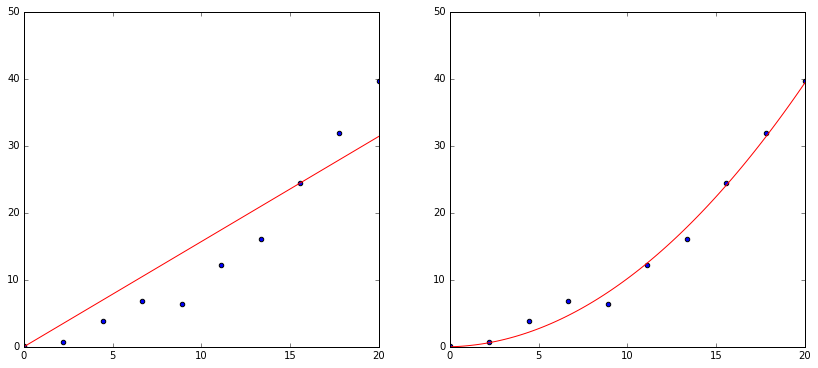

In [29]:
# Plot data

fig = plt.figure(figsize=(14, 6))

# Plot linear regression
ax1 = fig.add_subplot(1, 2, 1)
plt.scatter(X,y)
plt.plot(x_test, y_predict, "r")
plt.xlim(0, 20)
plt.ylim(0, 50)

# Plot polynomial regression

ax2 = fig.add_subplot(1, 2, 2)
plt.scatter(X,y)
plt.plot(x_pol, y_pol, "r")
plt.xlim(0, 20)
plt.ylim(0, 50);

* **Logistic regression**:
    Despite the name, this is a classification model
    
$$p(y\ |\ x, w) = \mathrm{Ber}(y\ |\ \mu(x)) = \mathrm{Ber}(y\ |\ \mathrm{sigm}(w^\intercal x))$$
    
    where
    
$$\displaystyle \mathrm{sigm}(x) = \frac{e^x}{1+e^x}$$

### Non-parametric models

These models don't have a finite number of parameters. For example the number of parameters increase with the amount of training data, as in KNN:

$$p(y=c\ |\ x, \mathcal{D}, K) = \frac{1}{K} \sum_{i \in N_K(x, \mathcal{D})} \mathbb{I}(y_i = c)$$

In [31]:
%run ../src/KNearestNeighbors.py

# Generate data from 3 gaussians
gaussian_1 = np.random.multivariate_normal(np.array([1, 0.0]), np.eye(2)*0.01, size=100)
gaussian_2 = np.random.multivariate_normal(np.array([0.0, 1.0]), np.eye(2)*0.01, size=100)
gaussian_3 = np.random.multivariate_normal(np.array([0.1, 0.1]), np.eye(2)*0.001, size=100)
X = np.vstack((gaussian_1, gaussian_2, gaussian_3))
y = np.array([1]*100 + [2]*100 + [3]*100)

# Fit the model
knn = KNearestNeighbors(5)
knn.fit(X, y)

# Predict various points in space
XX, YY = np.mgrid[-5:5:.2, -5:5:.2]
X_test = np.hstack((XX.ravel()[:, np.newaxis], YY.ravel()[:, np.newaxis]))
y_test = knn.predict(X_test)

In [ ]:
fig = plt.figure(figsize=(14, 6))

# Plot original data
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(X[y == 1,0], X[y == 1,1], 'ro')
ax1.plot(X[y == 2,0], X[y == 2,1], 'bo')
ax1.plot(X[y == 3,0], X[y == 3,1], 'go')

# Plot predicted data
ax2 = fig.add_subplot(1, 2, 2)
ax2.contourf(XX, YY, y_test.reshape(50,50), cmap=plt.cm.Spectral)
# ax2.plot(X_test[y_test == 1,0], X_test[y_test == 1,1], 'ro')
# ax2.plot(X_test[y_test == 2,0], X_test[y_test == 2,1], 'bo')
# ax2.plot(X_test[y_test == 3,0], X_test[y_test == 3,1], 'go')

### Curse of dimensionality

The *curse of dimensionality* refers to a series of problems that arise only when dealing with high dimensional data sets. For example, in the KNN model, if we assume the data is uniformly distributed over a $N$-dimensional cube (with high $N$), then most of the points are near its faces. Therefore, KNN loses its locality property.